In [6]:
! pip install spacy
! pip install WordCloud
import numpy as np 
import pandas as pd 
import string 
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline  

#### Reading dataset

In [7]:
data=pd.read_csv('nykaareviews_dataset.csv',encoding='Latin-1')
data

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
...,...,...,...,...,...,...,...,...,...
3217,Shivani Jaiswal,I am satisfy with the product..It is best prod...,5,0,True,NaN,2020-07-25 19:16:17,3aec5525-7284-5a84-9ea6-1cd8066828e1,"2021-07-31, 15:28:01"
3218,Ayushi Uppal,Best wet wipes till date for babies .... and f...,5,0,True,NaN,2020-03-14 19:48:48,3aec5525-7284-5a84-9ea6-1cd8066828e1,"2021-07-31, 15:28:01"
3219,anuradha ojha,They are soft and have light smell. I use this...,5,0,True,NaN,2020-03-09 10:20:03,3aec5525-7284-5a84-9ea6-1cd8066828e1,"2021-07-31, 15:28:01"
3220,Sonia Chowdhury,It makes my skin smooth and cleans the dirt aw...,5,0,True,NaN,2020-03-05 09:46:08,3aec5525-7284-5a84-9ea6-1cd8066828e1,"2021-07-31, 15:28:01"


#### No.of words in each review

In [22]:
data['word_count']=data['description'].apply(lambda x: len(str(x).split(" ")))
data[['description','word_count']].head()

,description,word_count
0,Super I loved it,5
1,My little brother is using it . His mother lov...,12
2,I've always used sebamed products for my kid. ...,10
3,Great soaps for kids. Smells amazing too,7
4,Nice soap with mild properties,5


#### No.of characters in each review

In [25]:
data['char_count'] = data['description'].str.len() 
data[['description','char_count']].head()

,description,char_count
0,Super I loved it,17
1,My little brother is using it . His mother lov...,53
2,I've always used sebamed products for my kid. ...,65
3,Great soaps for kids. Smells amazing too,40
4,Nice soap with mild properties,30


#### No.of stop words

In [28]:
!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

data['stopwords'] = data['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['description','stopwords']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,stopwords
0,Super I loved it,1
1,My little brother is using it . His mother lov...,2
2,I've always used sebamed products for my kid. ...,2
3,Great soaps for kids. Smells amazing too,2
4,Nice soap with mild properties,1


#### Total no.of stopwords

In [29]:
data['stopwords'].sum()  

24118

#### Normalizing data

In [30]:
data['description'] = data['description'].str.lower()
data['description'].head()

0                                    super i loved it 
1    my little brother is using it . his mother lov...
2    i've always used sebamed products for my kid. ...
3             great soaps for kids. smells amazing too
4                       nice soap with mild properties
Name: description, dtype: object

#### Removing punctuation and special characters

In [31]:
data['description'] = data['description'].str.replace('[^\w\s]','')
data['description'].head()

C:\Users\prana\AppData\Local\Temp\ipykernel_22592\1641833049.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description'] = data['description'].str.replace('[^\w\s]','')


0                                    super i loved it 
1    my little brother is using it  his mother love...
2    ive always used sebamed products for my kid no...
3              great soaps for kids smells amazing too
4                       nice soap with mild properties
Name: description, dtype: object

#### Removing stopwords

In [32]:
stop = stopwords.words('english')
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['description'].head()

0                                          super loved
1                    little brother using mother loves
2    ive always used sebamed products kid disappoin...
3                      great soaps kids smells amazing
4                            nice soap mild properties
Name: description, dtype: object

#### Tokenization

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
reviews=np.array(data['description'])
s=str(reviews)
s

"['super loved' 'little brother using mother loves'\n 'ive always used sebamed products kid disappointments' ...\n 'soft light smell use face wipes traveling lot removes dirt love'\n 'makes skin smooth cleans dirt away skin quite well loved'\n 'baby use make remover freshen skin lovely']"

In [36]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'super", 'loved', "'", "'little", 'brother', 'using', 'mother', "loves'", "'ive", 'always', 'used', 'sebamed', 'products', 'kid', 'disappointments', "'", '...', "'soft", 'light', 'smell', 'use', 'face', 'wipes', 'traveling', 'lot', 'removes', 'dirt', "love'", "'makes", 'skin', 'smooth', 'cleans', 'dirt', 'away', 'skin', 'quite', 'well', "loved'", "'baby", 'use', 'make', 'remover', 'freshen', 'skin', 'lovely', "'", ']']


#### Stemming

In [38]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['description'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    super love
1                 littl brother use mother love
2    ive alway use sebam product kid disappoint
3                     great soap kid smell amaz
4                       nice soap mild properti
Name: description, dtype: object

#### Lemmatization

In [39]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
lemmatized_words=[lemmatizer.lemmatize(word) for word in data['description']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
print(lemmatized_words)

['super loved', 'little brother using mother loves', 'ive always used sebamed products kid disappointments', 'great soaps kids smells amazing', 'nice soap mild properties', 'fragrance nice always good product sebamed', 'soap gentle skindoes makes skin dry', 'good mild soap gor babys soft skin using son since childhood', 'using smooth baby skin also feel fresh every time', 'product really gentle skin', 'use sience many years sebamed brand never pls use sebamed products babys', 'good soap baby skin nice frangnce', 'creamy nyc one infants', 'using feel skin soft prevent sun get tan using', 'using sevamed since couple months far better facewash ever used soft wont dry skin cleanses aptly id really suggest give try also single bar lasts months', 'awesome classic product soft baby skin fast delivery time reasonable price recommend go least love', 'much lather good job', 'im love soapits safe babiesi prefer one', 'great product works wonderful babies', 'suffered acne last 8 years used soap ex

In [41]:
reviews=''.join(data['description'])
reviews

'super lovedlittle brother using mother lovesive always used sebamed products kid disappointmentsgreat soaps kids smells amazingnice soap mild propertiesfragrance nice always good product sebamedsoap gentle skindoes makes skin drygood mild soap gor babys soft skin using son since childhoodusing smooth baby skin also feel fresh every timeproduct really gentle skinuse sience many years sebamed brand never pls use sebamed products babysgood soap baby skin nice frangncecreamy nyc one infantsusing feel skin soft prevent sun get tan usingusing sevamed since couple months far better facewash ever used soft wont dry skin cleanses aptly id really suggest give try also single bar lasts monthsawesome classic product soft baby skin fast delivery time reasonable price recommend go least lovemuch lather good jobim love soapits safe babiesi prefer onegreat product works wonderful babiessuffered acne last 8 years used soap expectations turned holy grail skin dont break like used clearing skin another 

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

## Wordcloud for reviews

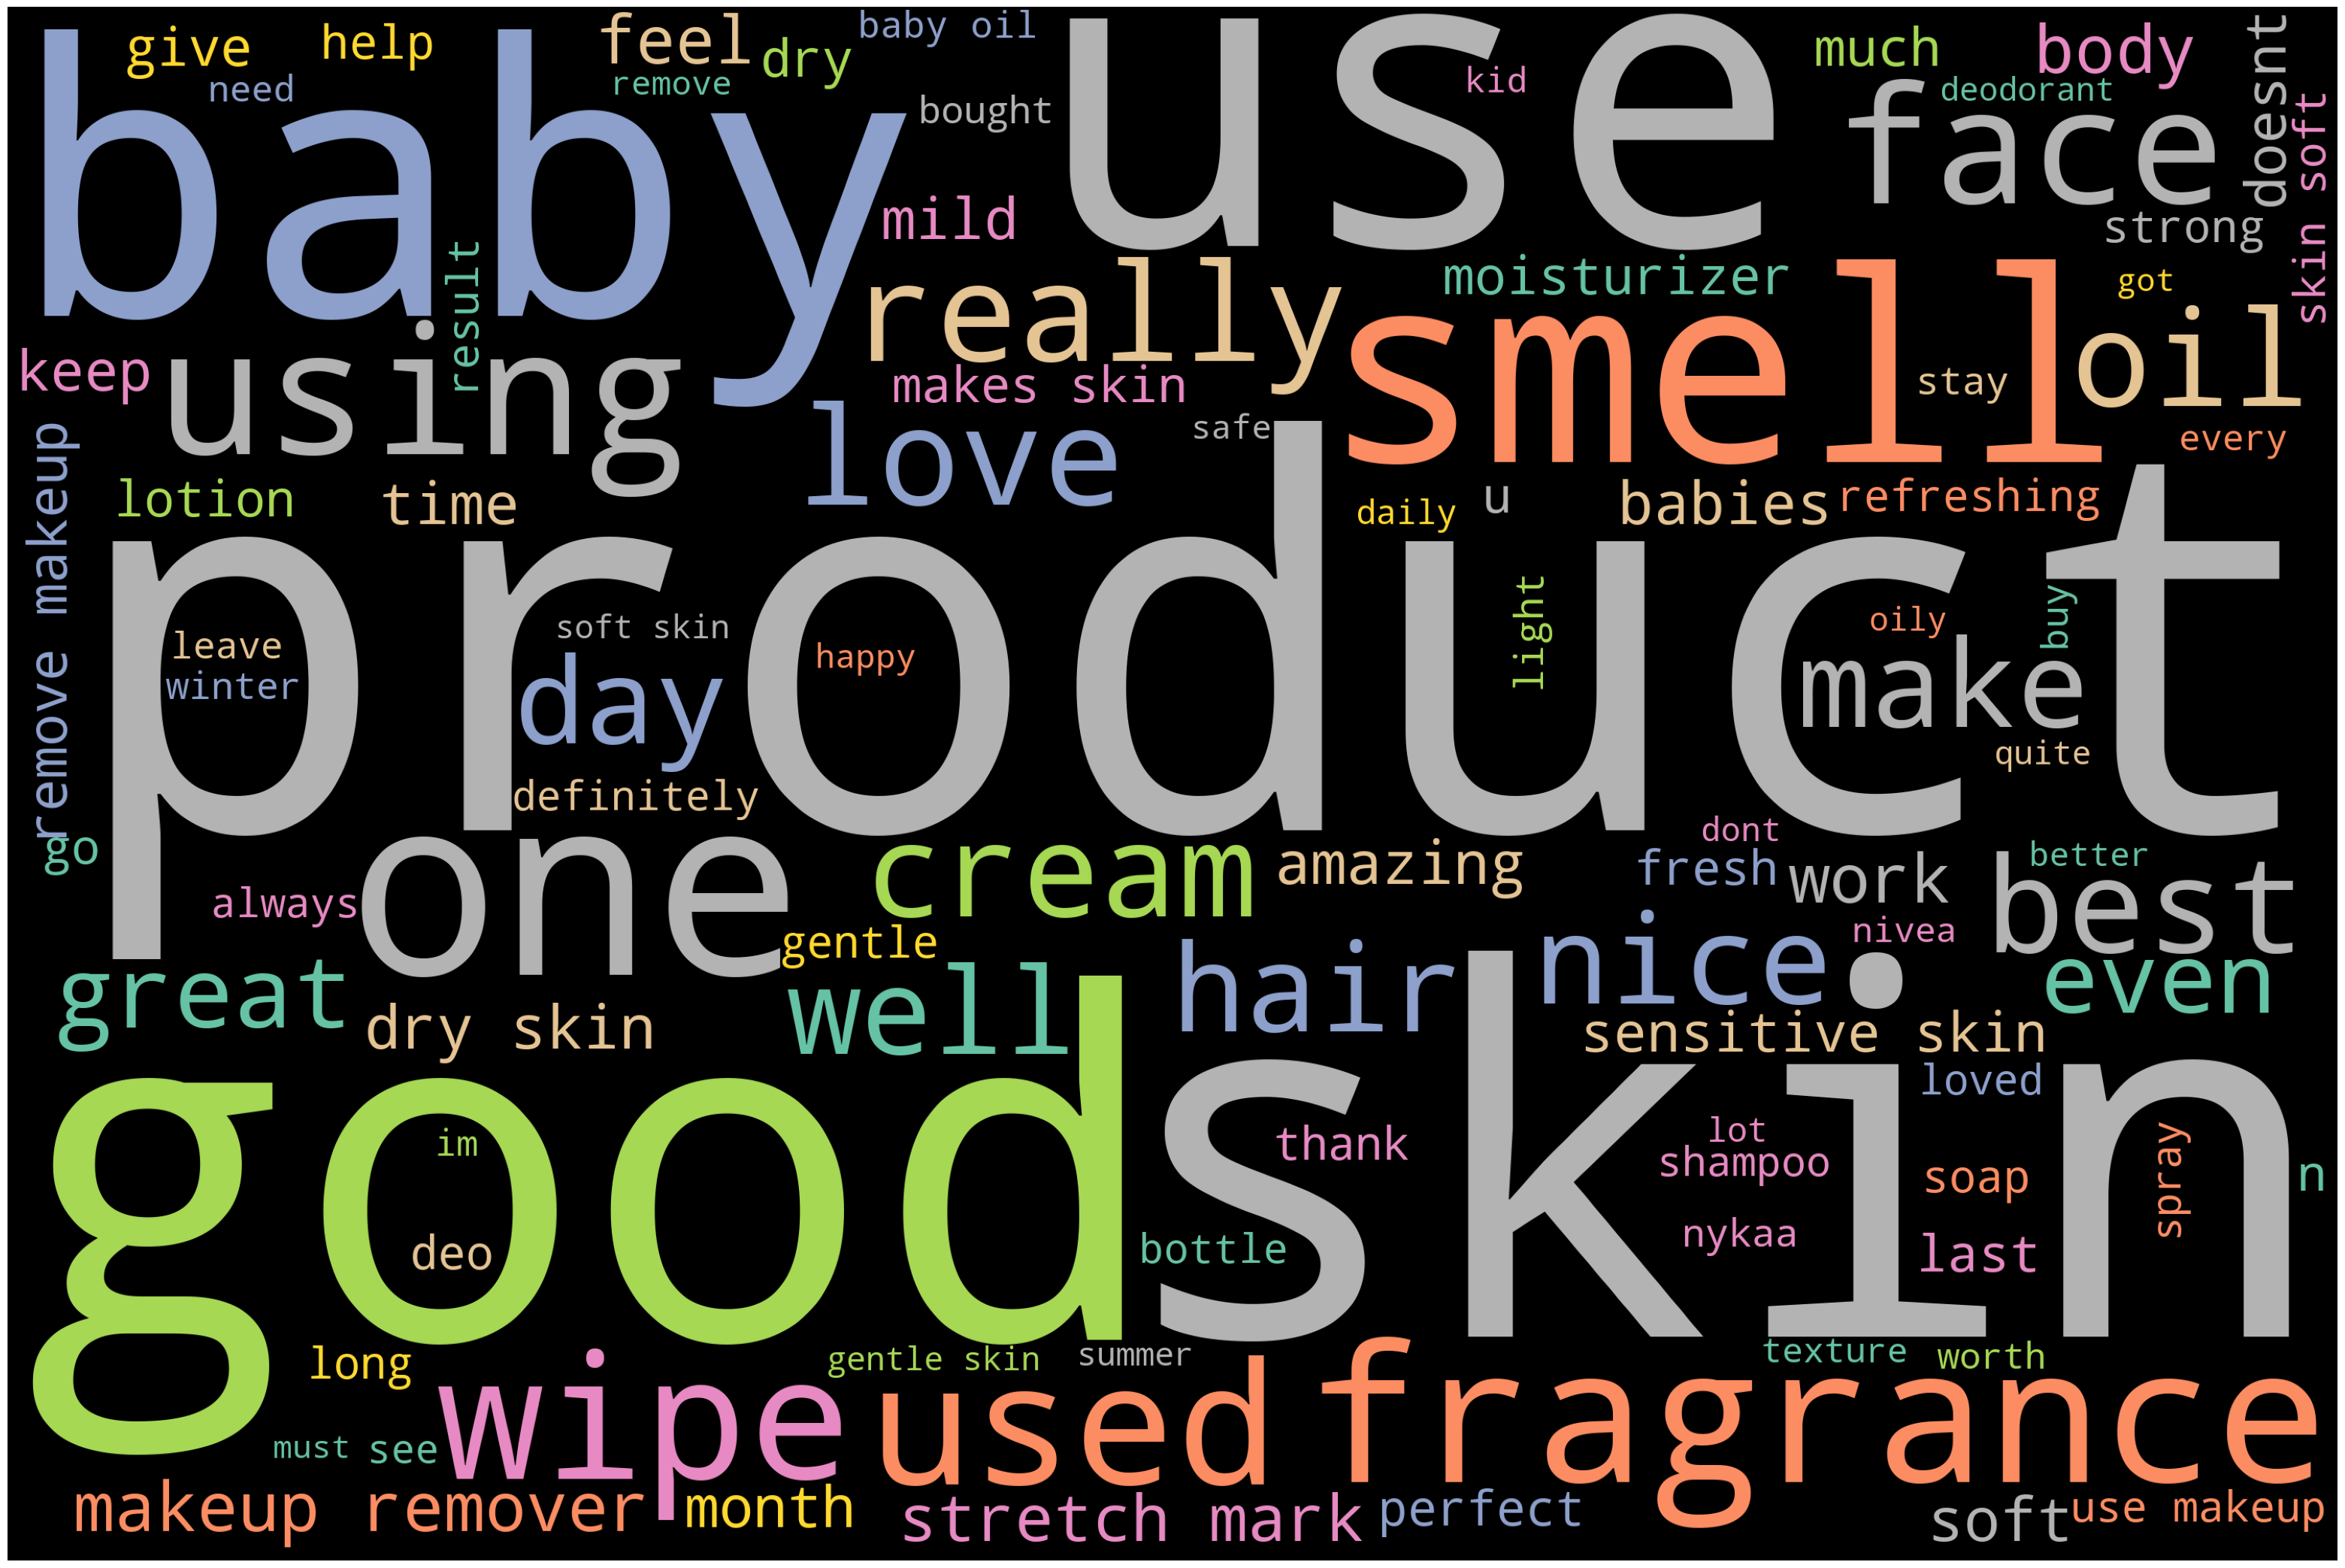

In [43]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(reviews)
# Plot
plot_cloud(wordcloud)

### These are the most used words in the reviews

## Sentiment analysis 

In [44]:
! pip install vaderSentiment

In [45]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...


True

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [47]:
def vader_sentiment(text):
    analyser=SentimentIntensityAnalyzer()
    return analyser.polarity_scores(text)['compound']

In [48]:
data['vader_sentiment']=data['description'].apply(vader_sentiment)

In [51]:
data[['description','vader_sentiment']].head()

,description,vader_sentiment
0,super loved,0.8316
1,little brother using mother loves,0.5719
2,ive always used sebamed products kid disappoin...,-0.4588
3,great soaps kids smells amazing,0.8360
4,nice soap mild properties,0.4215


In [53]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
data['sentiment']=data['vader_sentiment'].apply(getAnalysis)
data[['description','sentiment','vader_sentiment']]

,description,sentiment,vader_sentiment
0,super loved,Positive,0.8316
1,little brother using mother loves,Positive,0.5719
2,ive always used sebamed products kid disappoin...,Negative,-0.4588
3,great soaps kids smells amazing,Positive,0.8360
4,nice soap mild properties,Positive,0.4215
...,...,...,...
3217,satisfy productit best product skin,Positive,0.8020
3218,best wet wipes till date babies us also,Positive,0.6369
3219,soft light smell use face wipes traveling lot ...,Positive,0.4215
3220,makes skin smooth cleans dirt away skin quite ...,Positive,0.6335


In [54]:
count=data['sentiment'].value_counts()
count

Positive    2732
Neutral      354
Negative     136
Name: sentiment, dtype: int64

In [57]:
data[['name','description','sentiment','vader_sentiment']]

,name,description,sentiment,vader_sentiment
0,deepa shetty,super loved,Positive,0.8316
1,Ilteeza Islam,little brother using mother loves,Positive,0.5719
2,Zaneera,ive always used sebamed products kid disappoin...,Negative,-0.4588
3,ANJALI SHENISHETTY,great soaps kids smells amazing,Positive,0.8360
4,K.Latha,nice soap mild properties,Positive,0.4215
...,...,...,...,...
3217,Shivani Jaiswal,satisfy productit best product skin,Positive,0.8020
3218,Ayushi Uppal,best wet wipes till date babies us also,Positive,0.6369
3219,anuradha ojha,soft light smell use face wipes traveling lot ...,Positive,0.4215
3220,Sonia Chowdhury,makes skin smooth cleans dirt away skin quite ...,Positive,0.6335


#### Visualizing results

<BarContainer object of 3 artists>

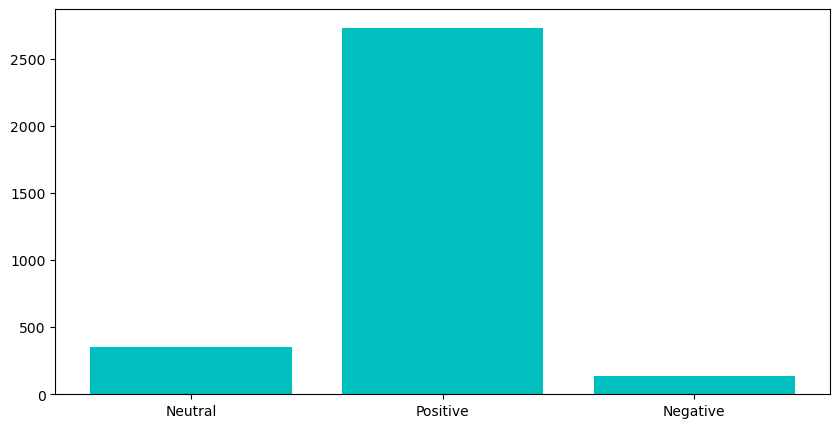

In [59]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[354,2732,136]
senti=['Neutral','Positive','Negative']
plt.bar(senti,count,color='c')

###### From above we can say that the reviews are more positive and only a few are negative ,neutral reviews.